# 7. 신경망, 딥러닝
## 7.1 뉴런 모델
- 신경 세포(실제 뇌) / 뉴런(수학적 모델)

### 7.1.1 신경 세포
### 7.1.2 뉴런 모델
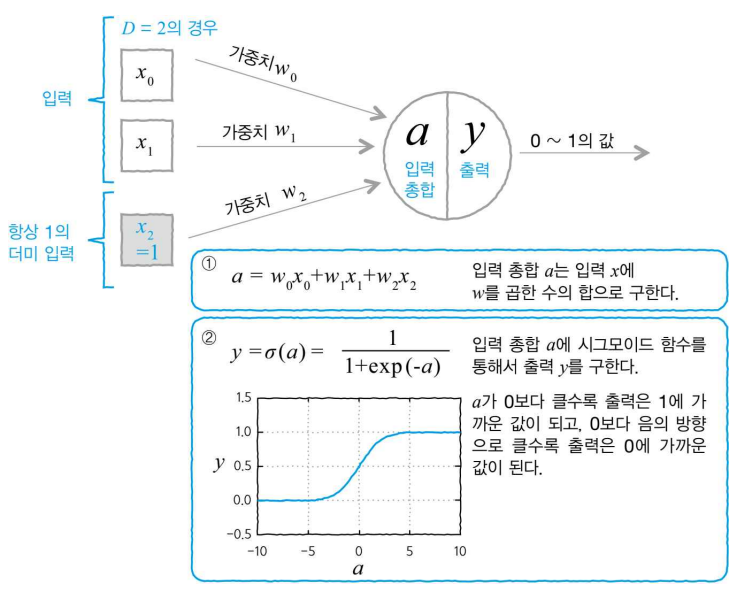

- 2개의 입력 $\mathbf{x} = (x_0, x_2)$ 들어옴을 가정
- 입력은 실수 (양수, 음수)
- 시냅스 전달 강도 (가중치, 하중) $w_0, w_1$
- 입력 총합 $a$
$$ a = w_0x_0 + w_1x_1 + w_2 $$
- $w_2$는 절편을 나타내는 매개변수 (바이어스 매개 변수, 바이어스 항)
- 항상 1을 갖는 $x_2$가 있다고 가정 시
$$ a = w_0x_0 + w_1x_1 + w_2x_2 $$
$$ a = \sum_{t_0}^2w_ix_i $$
- 입력 총합 $a$에 시그모이드 함수를 적용시킨 것을 출력값 $y$
$$y = \frac{1}{1+\exp(-a)} $$
- $y$는 0~1 사이 연속된 값 > $a$가 클수록 1에 가까워지며, $a$가 음의 큰 값을 가질수록 0에 가까워짐

- 위에서 정의한 뉴런 모델 = 로지스틱 회귀 모델
- 2차원의 입력 공간 $(x_0, x_1)$을 직선으로 나눠서 0-0.5 / 0.5-1 숫자 할당
- 입출력 맵: 아래와 같은 그래프로 정의
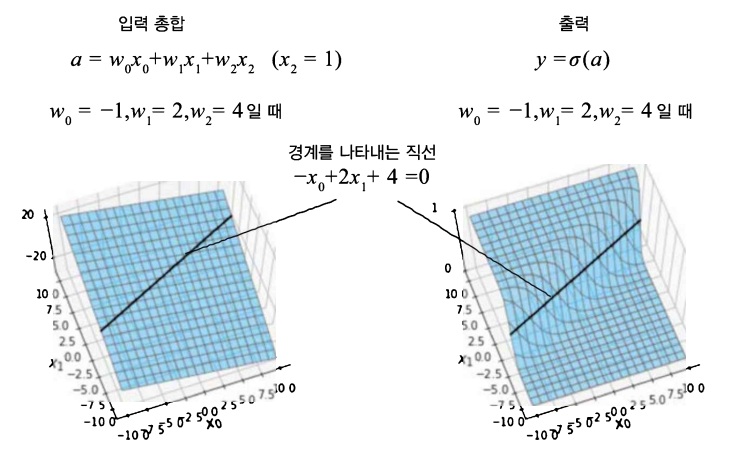

- 출력: 입력 총합의 평면 시그모이드 함수에 적용
    - 입력 총합의 평면 0~1 사이에 눌러 뭉갬
- 입력 차수에 2 대신 $D$를 적용 시 (일반화)
$$a=\sum_{i=0}^Dw_ix_i$$
$$y=\frac{1}{1+\exp(-a)}$$
- $x_D$는 항상 1의 값을 가짐 (더미 입력)

**$N$개의 데이터셋 $(x_n, t_n)$에 대한 뉴런 모델 학습 방법**
- 목적 함수: 평균 교차 엔트로피 오차
$$E(\mathbf{w})=-\frac{1}{N}\sum_{n=0}^{N-1}\{t_n\ln y_n + (1-t_n)\ln(1-y_n)\}$$
- 오차 함수의 매개 변수에 대한 기울기
$$\frac{∂E}{∂w_i}=\frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_{ni}$$
- 매개 변수의 학습 법칙
$$w_i(t+1)=w_i(t)-α\frac{∂E}{∂w_i}$$

## 7.2 신경망 모델
### 7.2.1 2층 피드 포워드 신경망
- 피드 포워드 신경망: 한 방향으로만 흐름 (되돌아가는 경로 X)
- 2층 피드 포워드 신경망 (입력층 미포함) <br>
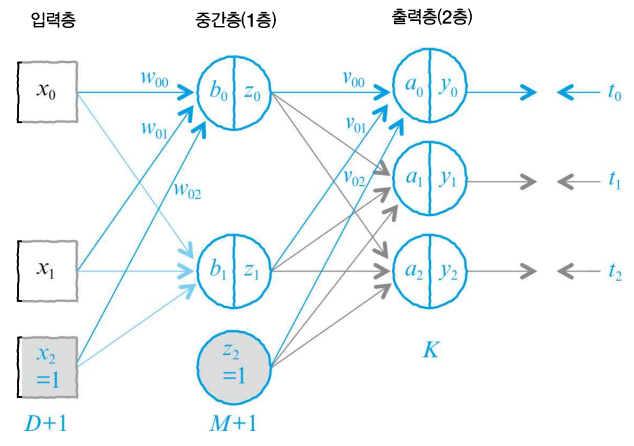

- 입력은 $x_0, x_1$의 2차원
- 항상 1을 갖는 더미 $x_2$ 추가
- 중간층 두 뉴런에 정보 전달
- $i$번째 입력부터 $j$번째 뉴런에 대한 가중치 $w_{ji}$
- $j$번재 뉴런의 입력 총합 $b_j$
$$ b_j = \sum_{i=0}^2w_{ji}x_i $$
- 입력 총합을 시그모이드 함수에 적용해서 중간층 뉴런 출력 $z_j$
$$ z_j = h(b_j) $$
- 중간층 $j$번째 뉴런부터 출력층 $k$번째 뉴런의 가중치 $v_{kj}$
- 출력층 번호 k번째의 뉴런의 입력 총합 $a_k$
$$a_k=\sum_{j=0}^2v_{kj}z_j$$
    - $z_2$는 항상 1의 값을 출력하는 더미 뉴런
- 출력층의 출력 $y_k$는 소프트맥스 함수 사용
    - 확률을 나타내기 위해서면 $\exp$를 사용하지 않아도 되는데 왜? > non linearity 추가가 목적이기 때문에
$$y_k = \frac{\exp(a_k)}{\sum_{i=0}^2\exp(a_i)}=\frac{\exp(a_k)}{u}$$
- 입력 차원 $D$, 중간층 뉴런 수 $M$, 출력 차원 $K$ <br>
중간층 입력 총합
$$b_j=\sum_{i=0}^Dw_{ji}x_i$$
중간층 출력
$$z_j=h(b_j)$$
출력층 입력 총합
$$a_k=\sum_{j=0}^Mv_{kj}z_j$$
출력층 출력
$$y_k=\frac{\exp(a_k}{\sum_{l=0}^{K-1}\exp(a_l)}=\frac{\exp(a_k)}{u}$$

### 7.2.2 2층 포워드 신경망 구현

In [ ]:
import numpy as np

# 데이터 생성
np.random.seed(seed=1) # 난수 고정
N = 200 # 데이터 수
K = 3 # 분포 수
T = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] # X0의 범위, 표시용
X_range1 = [-3, 3] # X1의 범위, 표시용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, 0.5]]) # 분포 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포 분산
Pi = np.array([0.4, 0.8, 1]) # 각 분포 비율
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :]==1, k] + Mu[T[n, :] == 1, k]


# 2 분류 데이터를 테스트 훈련 데이터로 분할
TestRatio = 0.5
X_n_training = int(N*TestRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:, :]
T_train = T[:X_n_training, :]
T_test = T[X_n_training:, :]

# 데이터를 class_data.npz에 저장
np.savez("class_data.npz", X_train = X_train, T_train = T_train, X_test = X_test, T_test = T_test, X_range0 = X_range0, X_range1 = X_range1)

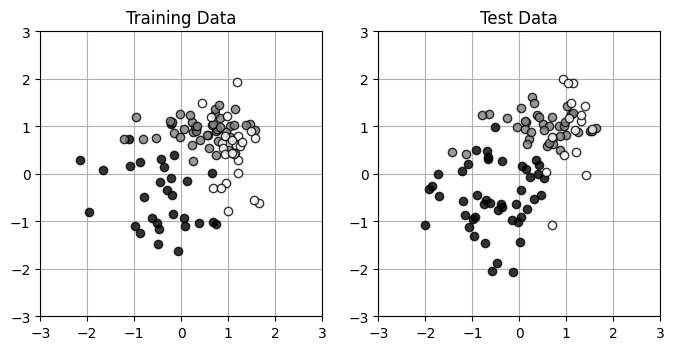

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 그리기
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle="none", marker="o", markeredgecolor="black", color=c[i], alpha=0.8)
    plt.grid(True)

# 메인
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title("Training Data")
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title("Test Data")
plt.show()

- FNN: 2층의 피드 포워드 신경망을 정의하는 함수
    - 네트워크의 입력 x를 받아서 y를 출력
    - 입력 x D차원 벡터, 출력 y K차원 벡터
    - D=2, K=3으로 가정 <br>
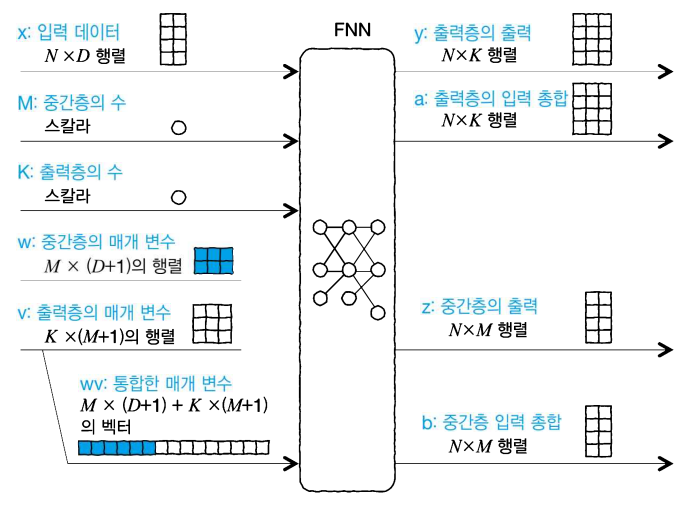

In [ ]:
wv = np.array([i for i in range(15)])

- wv의 길이: $M×(D+1)+K×(M+1)$
- N개의 데이터 대응한 출력 y, 중간층 출력 z, 출력층&중간층 입력 총합 a, b 출력 > wv 학습에 사용

In [ ]:
# 시그모이드 함수
def Sigmoid(x):
    y = 1 / (1+np.exp(-x))
    return y

# 네트워크
def FNN(wv, M, K, x):
    N, D = x.shape # 입력 차원
    w = wv[:M*(D+1)] # 중간층 뉴런 가중치
    w = w.reshape(M, (D+1))
    v = wv[M*(D+1):] # 출력층 뉴런 가중치
    v = v.reshape((K, M+1))
    b = np.zeros((N, M+1)) # 중간층 뉴런 입력 총합
    z = np.zeros((N, M+1)) # 중간층 뉴런 출력
    a = np.zeros((N, K)) # 출력층 뉴런 입력 총합
    y = np.zeros((N, K)) # 출력층 뉴런 출력
    for n in range(N):
        # 중간층 계산
        for m in range(M):
            b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1]) # (A) np.r_[x[n, :], 1] 항상 1이 되는 더미 입력을 x의 3번째 요솔 덧붙임
            z[n, m] = Sigmoid(b[n, m])
        # 출력층 계산
        z[n, M] = 1 # 더미 뉴런
        wkz = 0
        for k in range(K):
            a[n, k] = np.dot(v[k, :], z[n, :])
            wkz = wkz + np.exp(a[n, k])
        for k in range(K):
            y[n, k] = np.exp(a[n, k]) / wkz
    return y, a, z, b

# test
WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

### 7.2.3 수치 미분법
- 평균 교차 엔트로피 오차 사용
$$ E(\mathbf{w}, \mathbf{v}) = -\frac{1}{N}\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}t_{nk}\log(y_{nk}) $$

In [ ]:
# 평균 교차 엔트로피 오차
def CE_FNN(wv, M, K, x, t):
    N, D = x.shape
    y, a, z, b = FNN(wv, M, K, x)
    ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
    return ce

# test
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

- $w$는 $w*$의 값을 갖고 있음
- 경사 하강법은 $w*$ 지점에서 $E(w)$의 $w$에 대한 편미분 $∂E/∂w$ 계산 후 마이너스를 곱한 방향으로 $w*$ 갱신
- $E(w*-ϵ)$과 $E(w*+ϵ)$을 구하면 $w*$ 지점의 기울기 근사 가능
$$ \frac{∂E}{∂w}|_{w*} \cong \frac{E(w*+ϵ)-E(w*-ϵ)}{2ϵ} $$
- 현재의 $w_0*, w_1*, w_2*$에 대한 기울기 근사 시
    - $w_0*$에 대한 편미분을 근사하면 (다른 변수에 대해서도 동일)
$$ \frac{∂E}{∂w}|_{w_0*, w_1*, w_2*} \cong \frac{E(w_0*+ϵ, w_1*, w_2*)-E(w_0*-ϵ, w_1*, w_2*)}{2ϵ} $$
- 단점은 계산 비용
    - 하나의 매개 변수 미분 위해 두 번의 $E$ 계산 요구

[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


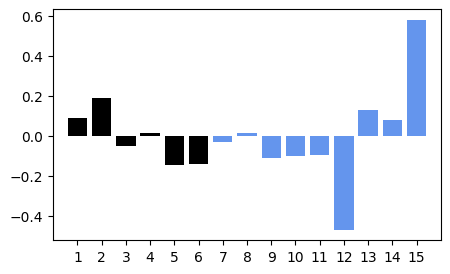

In [ ]:
# 수치 미분
def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)
    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        wv_modified[iwv] = wv[iwv] - epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        wv_modified[iwv] = wv[iwv] + epsilon
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iwv] = (mse2-mse1) / (2*epsilon)
    return dwv

# dVW 표시
def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M*3+1), wv[:M*3], align="center", color="black")
    plt.bar(range(M*3+1, N+1), wv[M*3:], align="center", color="cornflowerblue")
    plt.xticks(range(1, N+1))
    plt.xlim(0, N+1)

# test
M = 2
K = 3
nWV = M*3 + K*(M+1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print(dWV)
plt.figure(1, figsize=(5, 3))
Show_WV(dWV, M)
plt.show()

- $ϵ$는 0.001로 정의
- M=2, K=3, 가중치는 임의 생성
- 매개 변수의 값을 막대 그래프로 표시

### 7.2.4 수치 미분법에 의한 경사 하강법
- 입력에 학습시키는 가중치 초기값 ```wv_init```
- 훈련 데이터+테스트 데이터 입력 (오버피팅 확인 위해)
- ```n```은 학습 단계, ```alpha```는 학습 상수
- ```Fit_FNN_num```의 출력은 최적화된 매개 변수 ```wvt```


In [ ]:
import time
# 수치 미분을 사용한 구배법
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n): # (A)
        wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
        wv_hist[i, :] = wvt
    return wvt, wv_hist, err_train, err_test

# 메인
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000 # (B) 학습 단계
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:236.768 sec


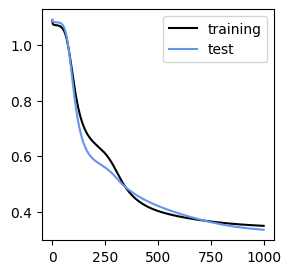

In [ ]:
# 학습 오차 표시
plt.figure(1, figsize=(3, 3))
plt.plot(Err_train, "black", label="training")
plt.plot(Err_test, "cornflowerblue", label="test")
plt.legend()
plt.show()

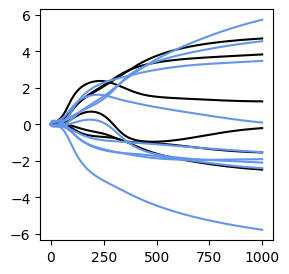

In [ ]:
# 가중치 시간 변화 표시
plt.figure(1, figsize=(3, 3))
plt.plot(WV_hist[:, :M*3], "black")
plt.plot(WV_hist[:, M*3:], "cornflowerblue")
plt.show()

- 400단계 부근에서 가중치 그래프 교차 = 오차 함수의 기울기 방향 변화
    - 안장점 근처를 통과해서

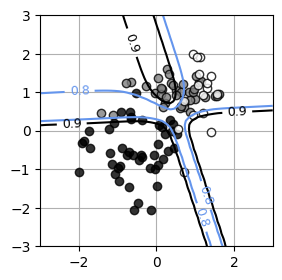

In [ ]:
# 경계선 표시 함수
def show_FNN(wv, M, K):
    xn = 60 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 'F'), np.reshape(xx1, xn * xn, 'F')]  #1로 하면 오류나서 'F'로 변경
    y, a, z, b = FNN(wv, M, K, x)
    plt.figure(1, figsize=(4, 4))
    for ic in range(K):
        f = y[:, ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels=[0.8, 0.9],
                           colors=['cornflowerblue', 'black'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)


# 경계선 표시
plt.figure(1, figsize=(3, 3))
Show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

### 7.2.5 오차 역전파법
- 네트워크의 출력에서 발생하는 오차의 정보를 이용 > 출력층의 가중치 $v_{kj}$에서 중간층 가중치 $w_{ji}$로 입력 방향의 반대로 가중치 갱신

- 오차 함수: 평균 교차 엔트로피 오차
$$ E(\mathbf{w}, \mathbf{v}) = -\frac{1}{N}\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}t_{nk}\ln(y_{nk}) $$
- 하나의 데이터 $n$에만 해당하는 상호 엔트로피 오차
$$E_n(\mathbf{w}, \mathbf{v})=-\sum_{k=0}^{K=1}t_k\ln(y_k)$$
$$E(\mathbf{w}, \mathbf{v})=\frac{1}{N}\sum_{n=0}^{N-1}E_n(\mathbf{w}, \mathbf{v})$$
    - 즉, 평균 상호 엔트로피 오차는 데이터 각각의 상호 엔트로피 오차의 평균
$$\frac{∂E}{∂w_{ji}}=\frac{∂}{∂w_{ji}}\frac{1}{N}\sum_{n=0}^{N-1}E_n=\frac{1}{N}\sum_{n=0}^{N-1}\frac{∂E_n}{∂W_{ji}}$$

### 7.2.6 $\partial E_n/∂v_{kj}$ 구하기
$∂E/∂v_{kj}$ 두 미분의 곱으로 분해
$$ \frac{∂E}{∂v_{kj}}=\frac{∂E}{∂a_k}\frac{∂a_k}{∂v_{kj}} $$
$k=0$일 때
$$\frac{∂E}{∂a_0}=\frac{∂}{∂a_0}(-t_0\log y_0-t_1\log y_1-t_2\log y_2)$$
$t_k$는 상수, $y_k$는 $a_0$의 함수로 확장 시
$$\frac{∂E}{∂a_0}=-t_0\frac{1}{y_0}\frac{∂y_0}{∂a_0}-t_1\frac{1}{y_1}\frac{∂y_1}{∂a_0}-t_2\frac{1}{y_2}\frac{∂y_1}{∂a_0}$$
$y$가 $a$의 소프트맥스 함수로 만들어져 있기에
$$\frac{∂y_0}{∂a_0}=y_0(1-y_0)$$
$$\frac{∂y_1}{∂a_0}=y_0y_1$$
$$\frac{∂y_2}{∂a_0}=y_0y_2$$
식을 다시 정리하면
$$\frac{∂E}{∂a_0}=-t_0\frac{1}{y_0}\frac{∂y_0}{∂a_0}-t_1\frac{1}{y_1}\frac{∂y_1}{∂a_0}-t_2\frac{1}{y_2}\frac{∂y_1}{∂a_0} = -t_0(1-y_0)+t_1y_0+t_2y_0 = (t_0+t_1+t_2)y_0 - t_0 = y_0 - t_0$$
$k-1, 2$의 경우도 다음과 같이 구할 수 있음
$$\frac{∂E}{∂a_1}=y_1-t_1 \quad \frac{∂E}{∂a_2}=y_2-t_2$$

즉, 위의 식들을 정리하면
$$\frac{∂E}{∂a_k}=y_k-t_k$$
$∂E/∂a_k$는 출력층의 오차이므로
$$\frac{∂E}{∂a_k}=δ_k^{(2)}$$
위의 수식은 오차 함수에 크로스 엔트로피 사용 > 오차 함수에 제곱 오차 사용 시
$$\frac{∂E}{∂a_k}=δ_k^{(2)}=(y_k-t_k)h'(a_k)$$
$h(x)$는 출력층 뉴런 활성화 함수, 활성화 함수로 시그모이드 $σ(x)$를 사용할 경우
$$h'(x)=(1-σ(x))σ(x)$$
$∂a_k/∂v_{kj}$에 대해 $k=0$일 시 $a_0$은
$$a_0=v_{00}z_0+v_{01}z_1+v_{02}z_2$$
즉,
$$\frac{∂a_0}{∂v_{00}}=z_0, \quad \frac{∂a_0}{∂v_{01}}=z_1, \quad \frac{∂a_0}{∂v_{02}}=z_2$$
위 식을 정리하면
$$\frac{∂a_0}{∂v_{0j}}=z_j$$
$k=1, k=2$에 대해 일반화하면
$$\frac{∂a_k}{∂v_{kj}}=z_j$$
위의 결과를 이용해 식을 정리하면
$$\frac{∂E}{∂v_{kj}}=\frac{∂E}{∂a_k}\frac{∂a_k}{∂v_{kj}}=(y_k-t_k)z_j=δ_k^{(2)}z_j$$
따라서 $v_{kj}$의 갱신 규칙은
$$v_{kj}(t+1)=v_{kj}(t)-α\frac{∂E}{∂v_{kj}}=v_{kj}(t)-αδ_k^{(2)}z_j$$

- 가중치 $v_{kj}$: 중간층의 뉴런 $j$에서 출력층의 뉴런 $k$에 정보를 ㅓㄴ달하는 결합의 가중치
  - 결합 변경 크기: 입력 크기 $z_j$와 앞에서 생기는 오차 $\delta_k^{(2)}$의 곱으로 결정  
  - $z_j=σ(b_j)$이므로 항상 0~1 사이의 값 <br>
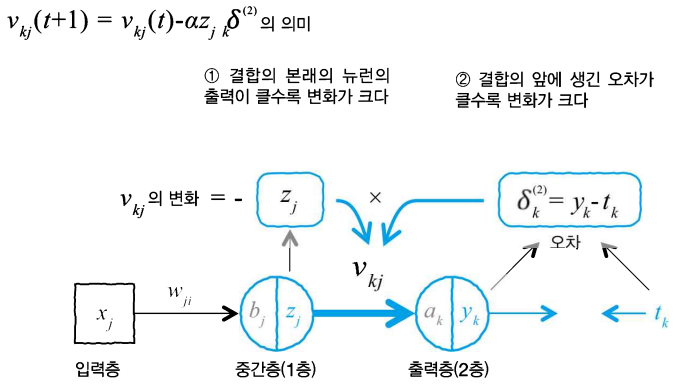

- 출력 $y$가 목표 데이터 $t_k$와 일치하는 경우
    - 오차 0
    - $αδ_k^{(2)}z_j=0$
    - $v_{kj}$ 변화 X
- $t_k=0$, $y_k>0$일 경우
    - 오차 $δ_k^{(2)}=(y_k-t_k)$ 양수
    - $z_j$ 항상 양수
    - $αδ_k^{(2)}z_j$는 음수
    - $v_{kj}$ 감소하는 방향으로 변경
    - 지나치게 큰 출력 > 오차 발생 > $z_j$의 영향을 줄이는 방향으로 가중치 변경

### 7.2.7 $∂E_n/∂w_{ji}$ 구하기
$\frac{∂E}{∂w_{ji}}$ 분해 시
$$\frac{∂E}{∂w_{ji}}=\frac{∂E}{∂b_j}\frac{∂b_j}{∂w_{ji}}$$
$$\frac{∂E}{∂b_j}=δ_j^{(!)}$$
(1)은 1층(중간층)을 의미 <br>
$∂b_j/∂w_{ji}$는 다음과 같이 표현
$$\frac{∂b_j}{∂w_{ji}}=\frac{∂}{∂w_{ji}}\sum_{i=0}^Dw_{ji}x_i=x_i$$
$w_{ji}$의 갱신 규칙은 다음과 같음
$$w_{ji}(t+1)=w_ji(t)-α\frac{∂E}{∂w_{ji}}=w_{ji}(t)-αδ_j^{(1)}x_i$$
즉, $w_{ji}$도 결합 전에 발생한 오차와 결합 본래의 입력에 비례하는 형태 <br>
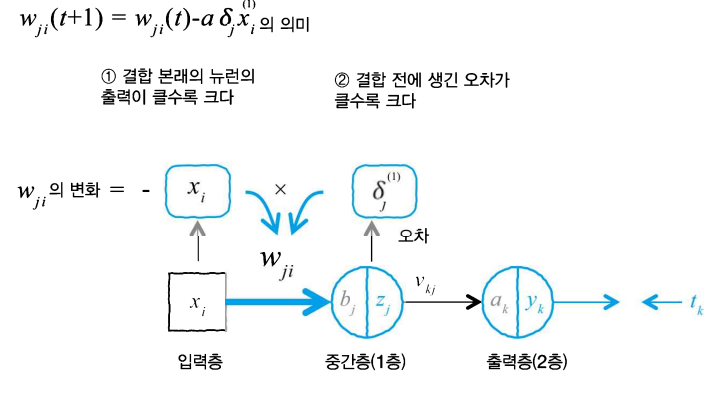

편미분 연쇄 법칙을 사용해 $δ_j^{(1)}$을 전개 시
$$δ_k^{(1)}=\frac{∂E}{∂b_j}=\{\sum_{k=0}^{K-1}\frac{∂E}{∂a_k}\frac{∂a_k}{∂z_j}\}\frac{∂z_j}{∂b_j}$$
$∂a_k/∂z_j$는 다음과 같음
$$\frac{∂a_k}{∂z_j}=\frac{∂}{∂z_j}\sum_{j=0}^Mv_{kj}z_j=v_kj$$
$∂z_j/∂b_j$를 중간층 활성화 함수 $h()$를 사용해서 표시하면
$$\frac{∂z_j}{∂b_j}=\frac{∂}{∂b_j}h(b_j)=h'(b_j)$$
따라서
$$δ_k^{(1)}=h'(b_j)\sum_{k=0}^{K-1}v_{kj}δ_k^{(2)}$$
- $h'(b_j)$는 활성화 함수의 미분, 항상 양수
- $\sum$에는 대상의 오차인 $δ_k^{(2)}$를 $v_{kj}$의 가중치로 모으는 형태
- 즉, $δ_j^{(1)}$은 결합한 곳에서 생긴 오차 $δ_k^{(2)}$를 반대 방향으로 전달해서 계산

- 오차 역전파법 정리 <br>
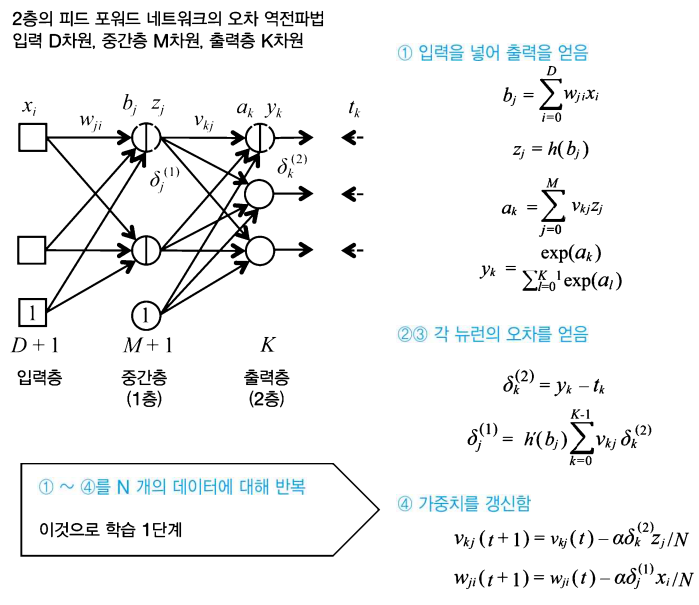

### 7.2.8 오차 역전파법의 구현

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


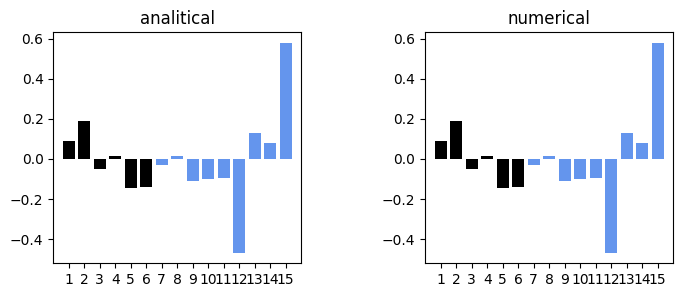

In [ ]:
# 해석적 미분
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape
    # wv을 w와 v로 되돌림
    w = wv[:M * (D + 1)]
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):]
    v = v.reshape((K, M + 1))
    # x를 입력하여 y를 얻음
    y, a, z, b = FNN(wv, M, K, x)
    # 출력 변수의 준비
    dwv = np.zeros_like(wv)
    dw = np.zeros((M, D + 1))
    dv = np.zeros((K, M + 1))
    delta1 = np.zeros(M) # 1층 오차
    delta2 = np.zeros(K) # 2층 오차 (k = 0 부분은 사용하지 않음)
    for n in range(N): # (A)
        # 출력층의 오차를 구하기
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])
        # 중간층의 오차를 구하기
        for j in range(M):
            delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2)
        # v의 기울기 dv를 구하기
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
        # w의 기울기 dw를 구하기
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N
    # dw와 dv를 합체시킨 dwv로 만들기
    dwv = np.c_[dw.reshape((1, M * (D + 1))), \
                dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv

# Show Vw
def Show_dWV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M*3+1), wv[:M*3], align="center", color="black")
    plt.bar(range(M*3+1, N+1), wv[M*3:], align="center", color="cornflowerblue")
    plt.xticks(range(1, N+1))
    plt.xlim(0, N+1)

# 동작 확인
M = 2
K = 3
N = 2
nWV = M*3 + K*(M+1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)

dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print("analytical dWV")
print(dWV_ana)

dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dWV")
print(dWV_num)

plt.figure(1, figsize=(8, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title("analitical")
plt.subplot(1, 2, 2)
Show_dWV(dWV_num, M)
plt.title("numerical")
plt.show()

- 해석적 미분값과 수치 미분 값이 거의 일치함을 확인 가능

In [ ]:
import time

# 해석적 미분을 사용한 경사 하강법
def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train) # (A) 수치 미분을 해석적 미분으로 변경
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test

# 메인
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M*3+K*(M+1))
N_step = 1000
alpha = 1
WV, WV_hist, Err_train, Err_test = Fit_FNN(WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:32.876 sec


- 수치 미분에 비해 빠른 계산 결과 확인 가능

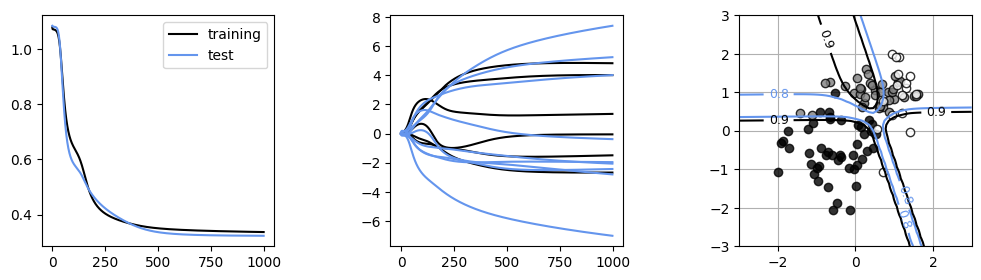

In [ ]:
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)

# 학습 오차 표시
plt.subplot(1, 3, 1)
plt.plot(Err_train, "black", label="training")
plt.plot(Err_test, "cornflowerblue", label="test")
plt.legend()

# 가중치 시간 변화 표시
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M*3], "black")
plt.plot(WV_hist[:, M*3:], "cornflowerblue")

# 경계선 표시
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

- 네트워크 규모 커질수록 미분 계산 속도 중요성 ↑
- 계산 속도 느린 수치 미분: 도출된 미분 방정식이 맞는지 확인

### 7.2.9 학습 후 뉴런의 특성

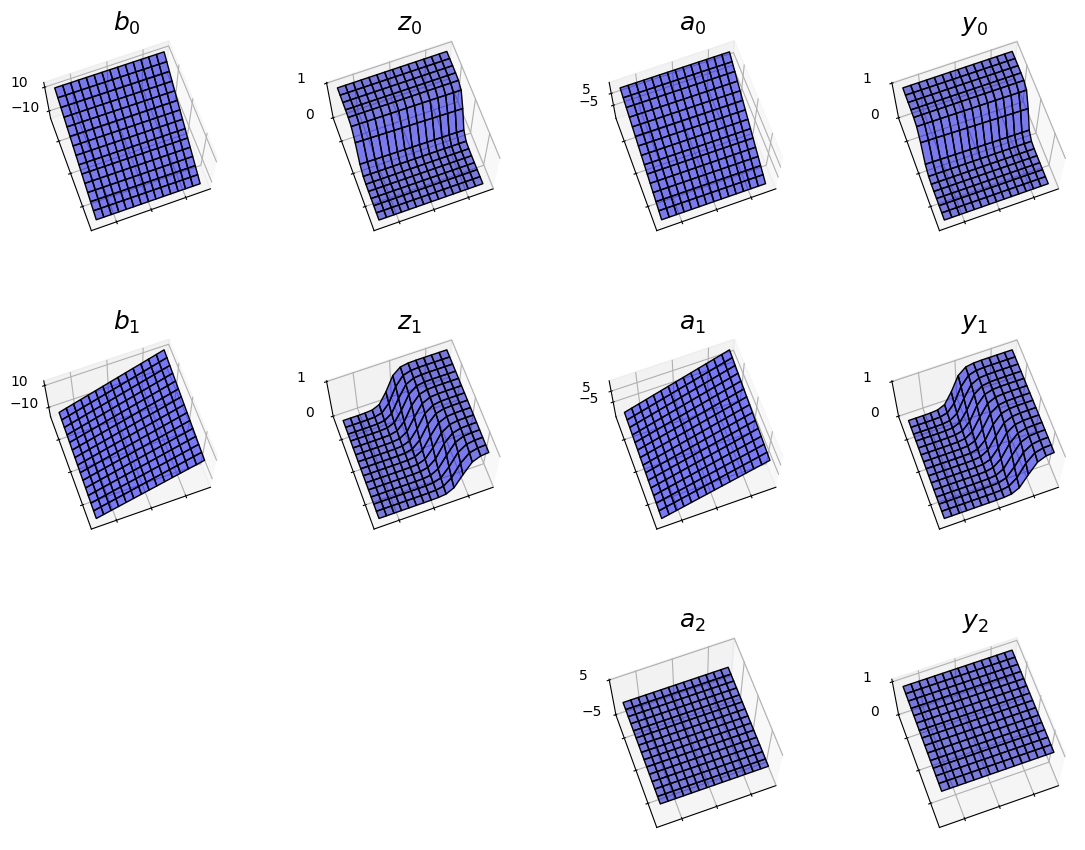

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def show_activation3d(ax, v, v_ticks, title_str):
    f = v.copy()
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, color="blue", edgecolor="black", rstride=1, cstride=1, alpha=0.5)
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)

M = 2
K = 3
xn = 15 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn*xn, "F"), np.reshape(xx1, xn*xn, "F")]
y, a, z, b = FNN(WV, M, K, x)

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95, top=0.95, wspace=0.4, hspace=0.4)

for m in range(M):
    ax = fig.add_subplot(3, 4, 1+m*4, projection="3d")
    show_activation3d(ax, b[:, m], [-10, 10], "$b_{0:d}$".format(m))
    ax = fig.add_subplot(3, 4, 2+m*4, projection="3d")
    show_activation3d(ax, z[:, m], [0, 1], "$z_{0:d}$".format(m))

for k in range(K):
    ax = fig.add_subplot(3, 4, 3+k*4, projection="3d")
    show_activation3d(ax, b[:, k], [-5, 5], "$a_{0:d}$".format(k))
    ax = fig.add_subplot(3, 4, 4+k*4, projection="3d")
    show_activation3d(ax, z[:, k], [0, 1], "$y_{0:d}$".format(k))

plt.show()

- 각 그래프는 다양한 $x_0, x_1$ 쌍이 입력된 경우의 각 변수의 값 표시 (입출력 맵)
- 중간층 입력 총합 $bj$ = 입력 $xi$의 선형 합 > 입출력 맵은 평면
- $\mathbf{W}$에 의해 면의 기울기 결정
- 입력 총합 $b_j$의 입출력 맵: 시그모이드 함수 $σ()$를 통과하며 0~1 사이 범위의 출력 $z_j$가 됨
- 출력층 입력 총합 $a_k$의 입출력 맵: $z_0, z_1$의 두 입출력 맵의 선형 합
    - $a_0, a_1$의 맵은 $z_0, z_1$의 조합에 의해 만들어짐

## 7.3 케라스로 신경망 모델 구현
### 7.3.1 2층 피드 포워드 신경망

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1) # (A) 케라스 내부에서 사용되는 난수 초기화
import keras.optimizers # (B) 케라스 관계의 라이브러리 import
from keras.models import Sequential # (C) 케라스 관계의 라이브러리 import
from keras.layers.core import Dense, Activation # (D) 케라스 관계의 라이브러리 import

# 데이터 로드
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

In [ ]:
# 데이터 그리기
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle='none', marker='o', markeredgecolor='black', color=c[i], alpha=0.8)
    plt.grid(True)

In [ ]:
# 난수 초기화
np.random.seed(1)

# Sequential 모델 작성
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid', kernel_initializer='uniform')) # (A)
model.add(Dense(3,activation='softmax', kernel_initializer='uniform')) # (B)
sgd = keras.optimizers.SGD(lr=1, momentum=0.0, decay=0.0, nesterov=False) # (C)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) # (D)


# 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs=1000, batch_size=100, verbose=0, validation_data=(X_test, T_test)) # (E)

# 모델 평가
score = model.evaluate(X_test, T_test, verbose=0) # (F)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'.format(score[0], score[1]))
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


cross entropy 0.33, accuracy 0.83
Calculation time:41.635 sec


### 7.3.2 케라스 사용의 흐름
케라스에서 필요한 라이브러리 ```import```



In [ ]:
import keras.optimizers
from keras.models import Sequential
from keras.layers.core import Dense, Activation

```Sequential```이라는 유형의 네트워크 모델로 ```model``` 생성 (변수 X 클래스에서 생성된 객체)

In [ ]:
model = Sequential()

```model```에 중간층으로 ```Dense```라는 전결합형의 층 추가

In [ ]:
model.add(Dense(2,input_dim=2,activation='sigmoid',kernel_initializer='uniform')) # (A)

- 2: 뉴런의 수
- ```input_dim=2```: 입력 차원이 2
- ```activation="sigmoid"```: 활성화 함수로 시그모이드 함수 사용
- ```Kernel_initializer="uniform"```: 가중치 매개 변수의 초기값을 균일 난수에서 결정
- 더미 입력(바이어스)은 기본값으로 설정

출력층도 ```Dense()```로 정의

In [ ]:
model.add(Dense(3,input_dim=2,activation='softmax',kernel_initializer='uniform')) # (B)

- 3: 뉴런의 수
- ```activation="softmax"```: 활성화 함수로 소프트맥스 사용
- ```kernel_initializer="uniform"```: 가중치 매개 변수는 균일 난수에서 생성

학습 방법의 설정을 ```keras.optimizers.SGD()```에서 실시

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=1, momentum=0.0,decay=0.0, nesterov=False) # (C)

- ```lr```은 학습 속도

```sgd```를 ```mode.compile()```에 전달해서 학습 방법의 설정이 이루어짐

In [ ]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']) # (D)

- ```loss="categorical_crossentropy```: 목적 함수를 교차 엔트로피로 지정
- ```metrics=["accuracy"]: 학습의 평가로 정답률도 계산

실제 학습은 ```model.fit()```으로 실행

In [ ]:
history=model.fit(X_train, T_train, batch_size=100, epochs=1000, verbose=0, validation_data=(X_test,T_test)) # (E)

- ```X_train, T_train```: 훈련 데이터 지정
- ```batch_size=100```: 1단계 분의 기울기를 계산하는 데 사용하는 학습 데이터 수
- ```epochs=1000```: 전체 데이터를 학습에 사용한 횟수
- ```verbos=0```: 학습 진행 상황 표시 X
- ```validation_data=(X_test, T_test)```: 평가용 데이터 지정
- ```history```: 학습 과정 정보

```model.evaluate()```에서 최종 학습의 평가 값 출력

In [ ]:
# 모델 평가
score = model.evaluate(X_test, T_test, verbose=0) # (F)
print('loss{0:f}, acc{1:f}'.format(score[0],score[1]))

loss0.323966, acc0.810000


- ```score[0]```: 테스트 데이터의 상호 엔트로피 오차
- ```score[1]```: 테스트 데이터의 정답률

113/113 [==============================] - 1s 4ms/step


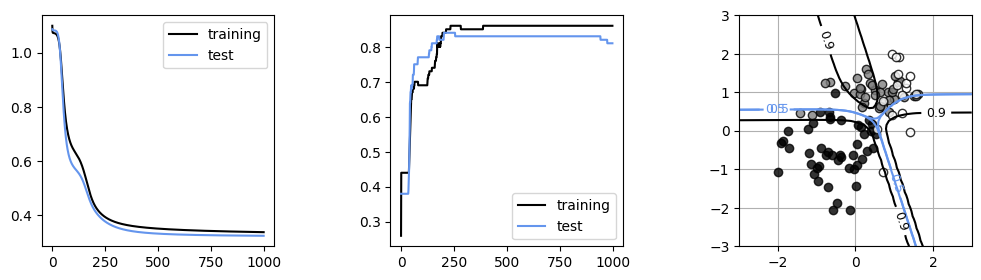

In [ ]:
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)

# 학습 곡선 표시
plt.subplot(1, 3, 1)
plt.plot(history.history["loss"], "black", label="training") # (A) 학습 과정의 훈련 데이터의 교차 엔트로피 오차의 시계열 정보
plt.plot(history.history["val_loss"], "cornflowerblue", label="test") # (B) 훈련 데이터의 교차 엔트로피 오차
plt.legend()

# 정확도 표시
plt.subplot(1, 3, 2)
plt.plot(history.history["accuracy"], "black", label="training") # (C) 훈련 데이터의 정답률
plt.plot(history.history["val_accuracy"], "cornflowerblue", label="test") # (D) 테스트 데이터의 정답률
plt.legend()

# 경계선 표시
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, "F"), np.reshape(xx1, xn * xn, "F")]
y = model.predict(x) # (E) 학습 완료된 모델에 의한 임의의 입력 x에 대한 예측
K = 3
for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=["cornflowerblue", "black"])
    cont.clabel(fmt="%1.1f", fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
plt.show()

- 훈련 데이터의 빠른 오차 감소 확인 가능
- 테스트 데이터 오차 증가 X, 오버피팅 X
- 정답률을 통해 성능 직관적 확인 가능 > 네트워크 성능 평가에 사용